# Speech Classification Task 

This is the python notebook for the Speech Classification task for MIDAS IIITD research internship selection process

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
! mkdir '/content/drive/My Drive/emotion'

mkdir: cannot create directory ‘/content/drive/My Drive/emotion’: File exists


## Getting the files from the zipped folder 

In [0]:
! unzip '/content/drive/My Drive/emotion.zip' -d '/content/drive/My Drive/emotion'

Archive:  /content/drive/My Drive/emotion.zip
   creating: /content/drive/My Drive/emotion/meld/
   creating: /content/drive/My Drive/emotion/meld/train/
   creating: /content/drive/My Drive/emotion/meld/train/happy/
  inflating: /content/drive/My Drive/emotion/meld/train/happy/MEL_dia526_utt5_positive_HAP.wav  
  inflating: /content/drive/My Drive/emotion/meld/train/happy/MEL_dia839_utt4_positive_HAP.wav  
  inflating: /content/drive/My Drive/emotion/meld/train/happy/MEL_dia916_utt0_positive_HAP.wav  
  inflating: /content/drive/My Drive/emotion/meld/train/happy/MEL_dia260_utt0_positive_HAP.wav  
  inflating: /content/drive/My Drive/emotion/meld/train/happy/MEL_dia165_utt19_positive_HAP.wav  
  inflating: /content/drive/My Drive/emotion/meld/train/happy/MEL_dia646_utt4_positive_HAP.wav  
  inflating: /content/drive/My Drive/emotion/meld/train/happy/MEL_dia517_utt6_positive_HAP.wav  
  inflating: /content/drive/My Drive/emotion/meld/train/happy/MEL_dia822_utt4_positive_HAP.wav  
  infl

In [0]:
! ls '/content/drive/My Drive/emotion/meld/train'

disgust  fear  happy  neutral  sad


## Defining path for Training and Validation Directory

In [0]:
TRAIN_PATH = '/content/drive/My Drive/emotion/meld/train/'
VAL_PATH = '/content/drive/My Drive/emotion/meld/val/'

# Data Preparation

In [0]:
import os 

# Checking out the number of files in the training data 

disgust = os.listdir(TRAIN_PATH+'disgust/')
disgust_len = len(disgust)

fear = os.listdir(TRAIN_PATH+'fear/')
fear_len = len(fear)

neutral = os.listdir(TRAIN_PATH+'neutral/')
neutral_len = len(neutral)

happy = os.listdir(TRAIN_PATH+'happy/')
happy_len = len(happy)

sad = os.listdir(TRAIN_PATH+'sad/')
sad_len = len(sad)

print("neutral:", neutral_len)
print("sad:", sad_len)
print("happy:", happy_len)
print("fear:", fear_len)
print("disgust:", disgust_len)

neutral: 4592
sad: 705
happy: 1609
fear: 216
disgust: 232


In [0]:
# Checking out the number of files in the validation data 

disgust = os.listdir(VAL_PATH+'disgust/')
disgust_len = len(disgust)

fear = os.listdir(VAL_PATH+'fear/')
fear_len = len(fear)

neutral = os.listdir(VAL_PATH+'neutral/')
neutral_len = len(neutral)

happy = os.listdir(VAL_PATH+'happy/')
happy_len = len(happy)

sad = os.listdir(VAL_PATH+'sad/')
sad_len = len(sad)

print("neutral:", neutral_len)
print("sad:", sad_len)
print("happy:", happy_len)
print("fear:", fear_len)
print("disgust:", disgust_len)

neutral: 517
sad: 79
happy: 181
fear: 25
disgust: 28


## Checking out the classes that we have to classify the sound into, both in the training and testing data

In [0]:
train_dir_list = os.listdir(TRAIN_PATH)
val_dir_list = os.listdir(VAL_PATH)

train_dir_list.sort()
val_dir_list.sort()

print(train_dir_list)
print(val_dir_list)

['disgust', 'fear', 'happy', 'neutral', 'sad']
['disgust', 'fear', 'happy', 'neutral', 'sad']


## Creating Dictionaries
we need to create a properly organised file containing the emotions and the file locations of the audio files. Organised data helps in easier analysis 

In [0]:
# creating the train dictionary 

train = {
    "emotion":[],
    "path":[], 
     
}

for i in train_dir_list: 
    fname = os.listdir(TRAIN_PATH+i)
    for f in fname: 
        if i =='disgust':
            train["emotion"].append('disgust')
        elif i == 'fear':
            train['emotion'].append('fear')
        elif i == 'happy':
            train['emotion'].append('happy')
        elif i == 'neutral':
            train['emotion'].append('neutral')
        elif i == 'sad':
            train['emotion'].append('sad')
        train['path'].append(TRAIN_PATH+ i+ "/"+ f)


In [0]:
# creating the val dictionary 

val = {
    "emotion":[], 
    "path":[]
}

for i in val_dir_list:
    fname = os.listdir(VAL_PATH+i)
    for f in fname:
        if i =='disgust':
            val["emotion"].append('disgust')
        elif i == 'fear':
            val['emotion'].append('fear')
        elif i == 'happy':
            val['emotion'].append('happy')
        elif i == 'neutral':
            val['emotion'].append('neutral')
        elif i == 'sad':
            val['emotion'].append('sad')
        val['path'].append(VAL_PATH+ i+ "/"+ f)


## Converting the dictionaries into dataframes 

In [0]:
train_df = pd.DataFrame(train)
val_df = pd.DataFrame(val)

In [0]:
train_df.head()

,emotion,path
0,disgust,/content/drive/My Drive/emotion/meld/train/dis...
1,disgust,/content/drive/My Drive/emotion/meld/train/dis...
2,disgust,/content/drive/My Drive/emotion/meld/train/dis...
3,disgust,/content/drive/My Drive/emotion/meld/train/dis...
4,disgust,/content/drive/My Drive/emotion/meld/train/dis...


In [0]:
val_df.head()

,emotion,path
0,disgust,/content/drive/My Drive/emotion/meld/val/disgu...
1,disgust,/content/drive/My Drive/emotion/meld/val/disgu...
2,disgust,/content/drive/My Drive/emotion/meld/val/disgu...
3,disgust,/content/drive/My Drive/emotion/meld/val/disgu...
4,disgust,/content/drive/My Drive/emotion/meld/val/disgu...


## Saving the dataframes into csv files, to prevent repeatetive processing 

In [0]:
# train_df.to_csv(TRAIN_PATH+"train_df.csv", index=None, header=True)
# val_df.to_csv(VAL_PATH+"val_df.csv", index=None, header=True)

Loading the files

In [0]:
import pandas as pd 
train_df = pd.read_csv(TRAIN_PATH+"train_df.csv")
train_df.head()

,emotion,path
0,disgust,/content/drive/My Drive/emotion/meld/train/dis...
1,disgust,/content/drive/My Drive/emotion/meld/train/dis...
2,disgust,/content/drive/My Drive/emotion/meld/train/dis...
3,disgust,/content/drive/My Drive/emotion/meld/train/dis...
4,disgust,/content/drive/My Drive/emotion/meld/train/dis...


In [0]:
val_df = pd.read_csv(VAL_PATH+"val_df.csv")
val_df.head()

,emotion,path
0,disgust,/content/drive/My Drive/emotion/meld/val/disgu...
1,disgust,/content/drive/My Drive/emotion/meld/val/disgu...
2,disgust,/content/drive/My Drive/emotion/meld/val/disgu...
3,disgust,/content/drive/My Drive/emotion/meld/val/disgu...
4,disgust,/content/drive/My Drive/emotion/meld/val/disgu...


# Lets Start with the Data Analysis

In [0]:
import numpy as np
import shutil
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook


% matplotlib inline 
matplotlib.style.use('ggplot')

### Checking the number of examples per category for training data

Text(0, 0.5, 'num samples')

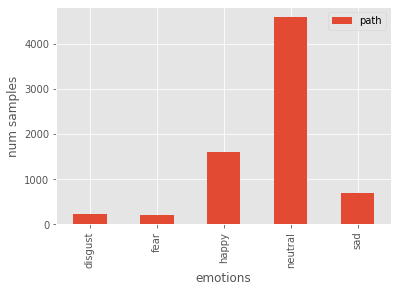

In [0]:
category_group = train_df.groupby(['emotion']).count()
plot = category_group.plot.bar()
plot.set_xlabel("emotions")
plot.set_ylabel("num samples")

### Checking the number of examples per category for validation data 

Text(0, 0.5, 'num samples')

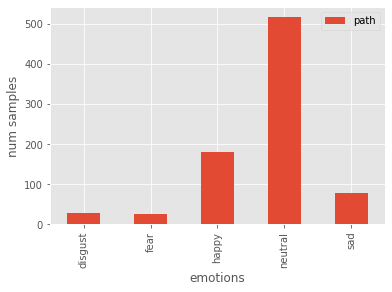

In [0]:
category_group = val_df.groupby(['emotion']).count()
plot = category_group.plot.bar()
plot.set_xlabel("emotions")
plot.set_ylabel("num samples")

In [0]:
# info about the training data 

print("Min. samples per category=", min(train_df.emotion.value_counts()))
print("Max. samples per category=", max(train_df.emotion.value_counts()))

Min. samples per category= 216
Max. samples per category= 4592


we observe that, the number of smaples per category is non-uniform. The minimum number of audio samples in a categoy is `216` while the maximum is `4592`
## Checking out an audio file in our dataset and loading it into numpy array

In [0]:
import IPython.display as ipd # to play the sound in the notebook
fname = TRAIN_PATH + 'happy/MEL_dia95_utt14_positive_HAP.wav'
ipd.Audio(fname)

In [0]:
# Using the wave library 

import wave
wav = wave.open(fname)
print("Sampling (frame) rate = ", wav.getframerate())
print("Total samples (frames) = ", wav.getnframes())
print("Duration = ", wav.getnframes()/wav.getframerate())

Sampling (frame) rate =  16000
Total samples (frames) =  30720
Duration =  1.92


In [0]:
# Using scipy
from scipy.io import wavfile
rate, data = wavfile.read(fname)
print("Sampling (frame) rate = ", rate)
print("Total samples (frames) = ", data.shape)
print(data)

Sampling (frame) rate =  16000
Total samples (frames) =  (30720, 2)
[[1279  -83]
 [ 975  277]
 [ 361  912]
 ...
 [  14   19]
 [ -17  -13]
 [ -10   -8]]


lets plot the audio

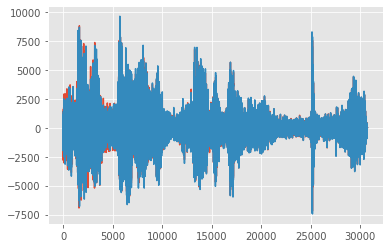

In [0]:


plt.plot(data, '-', );

Let's zoom in on the first 1000 frames 

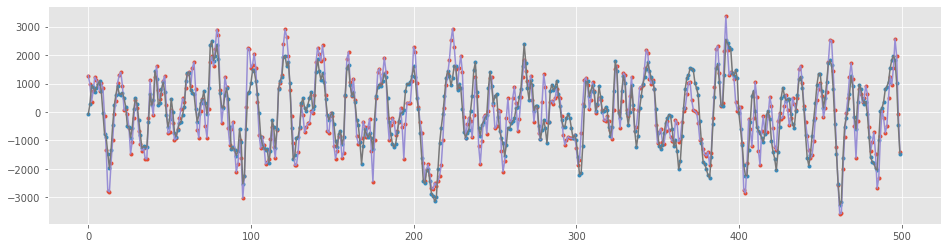

In [0]:
plt.figure(figsize=(16, 4))
plt.plot(data[:500], '.'); plt.plot(data[:500], '-');

## Audio Length
We shall now analyze the lengths of the audio files in our dataset 

In [57]:
# train_df['nframes'] = train_df['path'].apply(lambda f: wave.open(f).getnframes())
# val_df['nframes'] = val_df['path'].apply(lambda f: wave.open(f).getnframes())
train_df = pd.read_csv(TRAIN_PATH+"train1_df.csv")
val_df = pd.read_csv(VAL_PATH+"val_df1.csv")
print(train_df.head())
print(val_df.head())

   emotion                                               path  nframes
0  disgust  /content/drive/My Drive/emotion/meld/train/dis...   203093
1  disgust  /content/drive/My Drive/emotion/meld/train/dis...    26965
2  disgust  /content/drive/My Drive/emotion/meld/train/dis...    49493
3  disgust  /content/drive/My Drive/emotion/meld/train/dis...    37547
4  disgust  /content/drive/My Drive/emotion/meld/train/dis...   143701
   emotion                                               path  nframes
0  disgust  /content/drive/My Drive/emotion/meld/val/disgu...   182272
1  disgust  /content/drive/My Drive/emotion/meld/val/disgu...    48811
2  disgust  /content/drive/My Drive/emotion/meld/val/disgu...   132437
3  disgust  /content/drive/My Drive/emotion/meld/val/disgu...    20139
4  disgust  /content/drive/My Drive/emotion/meld/val/disgu...    19456


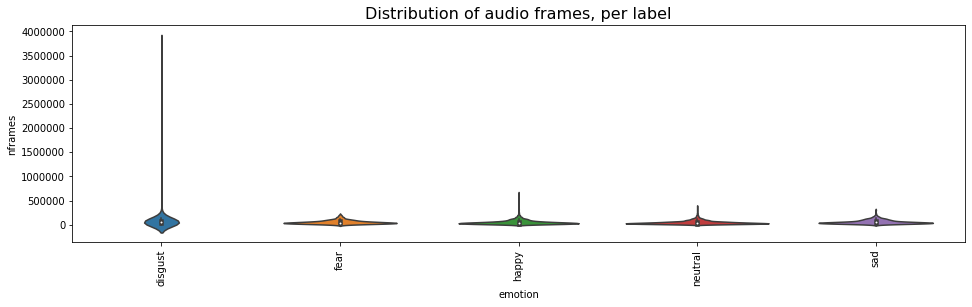

In [58]:
_, ax = plt.subplots(figsize=(16, 4))
sns.violinplot(ax=ax, x="emotion", y="nframes", data=train_df)
plt.xticks(rotation=90)
plt.title('Distribution of audio frames, per label', fontsize=16)
plt.show()

we observe, that the distributuion of audio across labels in non-uniform and has high variance 
Lets now analyze the framw length distribution in training and validation

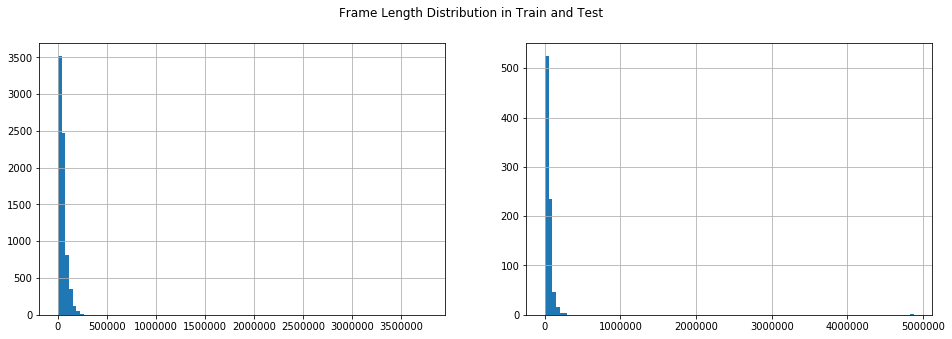

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
train_df.nframes.hist(bins=100, ax=axes[0])
val_df.nframes.hist(bins=100, ax=axes[1])
plt.suptitle('Frame Length Distribution in Train and Test', ha='center', fontsize='large');

We observe majority of files are short 

In [0]:
# saving the data 
# train_df.to_csv(TRAIN_PATH+"train1_df.csv", index=None, header=True)
# val_df.to_csv(VAL_PATH+"val_df1.csv", index=None, header=True)

In [0]:
import librosa
import librosa.display
import numpy as np
import scipy
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import json
import tensorflow as tf 
import glob
import pickle 
import os 
import pandas as pd
import wave

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


## Extracting the MFCC(Mel Frequency Cepstral Co-efficient) features 
MFCC features represent phonemes as the shape of the vocaltract (which is responsible for sound generation) is manifest in them

In [0]:
def extract_mfcc_features(wav_file_name):
  y, sr = librosa.load(wav_file_name)
  sr = np.array(sr)
  mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
  return mfccs

In [62]:
train = pd.DataFrame(columns=['features'])
counter = 0
for index, path in enumerate(train_df.path):
    mfccs = extract_mfcc_features(path)
    train.loc[counter] = [mfccs]
    if counter%100 == 0:
        print(counter)
    counter= counter+1
print(len(train))
train.head()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7354


,features
0,"[-253.53174992658094, 121.49847746137591, -44...."
1,"[-281.9851336915229, 76.44911817293861, -69.88..."
2,"[-271.7037479227176, 141.36239246515615, -42.8..."
3,"[-332.56752077147894, 131.58305629063642, -46...."
4,"[-246.61233049629473, 118.24425596554366, -56...."


In [63]:
train_x = pd.concat([train_df, train], axis=1)
train_x

,emotion,path,nframes,features
0,disgust,/content/drive/My Drive/emotion/meld/train/dis...,203093,"[-253.53174992658094, 121.49847746137591, -44...."
1,disgust,/content/drive/My Drive/emotion/meld/train/dis...,26965,"[-281.9851336915229, 76.44911817293861, -69.88..."
2,disgust,/content/drive/My Drive/emotion/meld/train/dis...,49493,"[-271.7037479227176, 141.36239246515615, -42.8..."
3,disgust,/content/drive/My Drive/emotion/meld/train/dis...,37547,"[-332.56752077147894, 131.58305629063642, -46...."
4,disgust,/content/drive/My Drive/emotion/meld/train/dis...,143701,"[-246.61233049629473, 118.24425596554366, -56...."
...,...,...,...,...
7349,sad,/content/drive/My Drive/emotion/meld/train/sad...,21845,"[-260.1254377010233, 156.96021344044124, -66.4..."
7350,sad,/content/drive/My Drive/emotion/meld/train/sad...,40277,"[-343.2650604700349, 140.10443425423935, -42.9..."
7351,sad,/content/drive/My Drive/emotion/meld/train/sad...,29013,"[-321.54090320763413, 129.2371121157424, -57.4..."
7352,sad,/content/drive/My Drive/emotion/meld/train/sad...,52907,"[-437.87638945612053, 118.52213832250217, 2.88..."


In [0]:
train_x.to_csv(TRAIN_PATH+'train_x.csv', index=None, header=True)

In [66]:
val = pd.DataFrame(columns=['feature'])

counter = 0

for index,path in enumerate(val_df.path):
  mfccs = extract_mfcc_features(path)
  val.loc[counter] = [mfccs]
  # if counter % 100 == 0:
  #   print(counter)
  counter += 1 

print(len(val))
val.head()

830


,feature
0,"[-318.509536581191, 120.06574576863467, -55.39..."
1,"[-345.32479315625534, 119.42001863222706, -48...."
2,"[-308.49549245001384, 137.2081470152892, -47.3..."
3,"[-446.42634593130623, 108.18838912481998, -34...."
4,"[-246.4645527616407, 111.7937216836893, -115.7..."


In [0]:
val_x = pd.concat([val_df, val], axis=1)
val_x.to_csv(VAL_PATH+'val_x.csv', index=None, header=True)

In [0]:
train = pd.concat([train_df, pd.DataFrame(train['features'].values.tolist())], axis=1)
train[:5]

,emotion,path,nframes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,disgust,/content/drive/My Drive/emotion/meld/train/dis...,203093,-253.531750,121.498477,-44.545355,47.547259,-30.966288,11.142311,-21.960563,8.897622,-12.436533,1.253223,2.420639,-11.856841,5.363330,-7.971945,10.379569,-5.022487,3.128662,-5.495970,-3.591642,-3.807007,-1.222945,1.349338,-10.369421,-0.653540,-6.707087,-3.137441,-7.983937,-1.834484,-5.440308,-5.664417,-2.254304,-5.089438,-2.771226,-7.078903,-1.736255,-7.548923,-1.935785,-1.628043,-3.916595,-2.767735
1,disgust,/content/drive/My Drive/emotion/meld/train/dis...,26965,-281.985134,76.449118,-69.885143,56.875565,-70.089921,30.162954,-27.148288,-9.325493,-26.187122,2.558670,-1.281052,-8.566605,-2.139918,-22.343645,9.903577,-5.914619,15.109506,8.825570,29.655151,4.553112,3.415523,10.359131,-8.933422,7.628922,-3.617340,4.395793,-10.487440,-2.248252,-4.903868,-3.557024,3.194190,2.450461,1.059840,-5.023668,4.487722,-3.905299,-1.596955,-3.000015,4.284007,-0.191568
2,disgust,/content/drive/My Drive/emotion/meld/train/dis...,49493,-271.703748,141.362392,-42.850058,54.910160,-37.022585,18.116249,-12.876416,1.894278,-9.733322,-0.593710,-3.946920,-5.839698,3.015268,-16.668580,6.789575,-5.536460,2.540270,-4.553031,2.838545,-0.666619,-4.013932,-0.878954,-5.186699,1.405821,-8.752654,2.691382,-6.307587,-2.561645,-1.216174,-2.640710,1.008311,0.679922,4.612264,1.362070,5.741417,-1.267523,1.794187,-1.044423,-0.946881,-1.279998
3,disgust,/content/drive/My Drive/emotion/meld/train/dis...,37547,-332.567521,131.583056,-46.881605,45.265087,-38.428280,15.239851,-15.542572,1.945350,-12.976561,-16.638955,-7.005873,-2.421950,1.676428,-5.509712,4.154719,-6.171185,7.020193,-7.917072,5.432060,-7.538357,-6.067644,2.791720,-6.525956,4.830525,-12.204580,-0.852032,-4.436188,-0.205214,-2.005062,-8.032380,5.362207,3.600605,4.191242,3.093782,3.948083,2.539034,3.641876,3.160209,5.969022,3.751212
4,disgust,/content/drive/My Drive/emotion/meld/train/dis...,143701,-246.612330,118.244256,-56.282253,44.822525,-30.980210,18.800375,-24.130625,1.719362,-10.509149,-8.249001,-7.055558,-9.081676,0.447551,-11.866575,3.190496,-9.611794,-0.104494,-9.189613,2.444549,-5.362058,-4.120644,1.064537,-4.953022,0.792091,-7.258923,3.044228,-9.903773,-2.945686,-4.943765,-3.817672,-0.280853,-5.211694,0.176926,-3.240772,1.687380,-2.813912,-0.096675,-3.682372,-0.856878,-0.040726


In [0]:
val = pd.concat([val_df,pd.DataFrame(val['feature'].values.tolist())],axis=1)
val[:5]

,emotion,path,nframes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,disgust,/content/drive/My Drive/emotion/meld/val/disgu...,182272,-318.509537,120.065746,-55.397827,31.948298,-42.911539,5.471446,-18.554238,-4.967956,-13.668447,-1.410551,-3.169204,-12.096651,-1.802262,-11.819341,4.426909,-11.735091,1.466406,-4.968503,-1.980064,-1.610178,-5.143166,-0.449938,-7.840578,0.117019,-8.273609,-2.105098,-5.618461,-3.823224,-3.363040,-4.274139,-3.263707,-5.615694,-1.203252,-4.210349,2.869318,1.348315,5.537388,5.281193,4.121932,3.644592
1,disgust,/content/drive/My Drive/emotion/meld/val/disgu...,48811,-345.324793,119.420019,-48.194489,49.570822,-32.509864,8.191829,-18.513820,6.582198,-7.692191,-9.203365,-7.383650,-5.743147,-2.968106,-7.819614,6.799586,-11.647430,-3.197935,-18.211657,-0.448492,-6.855269,-6.083215,-0.507778,-10.324284,3.608099,-9.937419,2.009296,-0.926603,3.470849,2.764532,0.291184,3.379718,-1.410365,0.430818,-4.685675,2.612908,0.109446,-0.496701,-4.593984,-2.787042,-2.639817
2,disgust,/content/drive/My Drive/emotion/meld/val/disgu...,132437,-308.495492,137.208147,-47.319773,48.663007,-26.287466,16.037575,-19.696197,1.889867,-3.652975,1.228382,3.465705,-1.452424,5.933631,-3.223690,9.889489,-13.278722,1.177358,-4.562155,-2.357934,-3.193042,-5.435657,-0.772964,-7.349218,4.951347,-3.138170,2.493065,-1.671128,2.067436,0.949612,-1.933616,1.419338,-3.106389,1.301408,-1.953164,1.078455,-1.157677,1.299831,-0.909086,-1.462642,-0.335137
3,disgust,/content/drive/My Drive/emotion/meld/val/disgu...,20139,-446.426346,108.188389,-34.602381,43.260125,-30.506438,21.311157,-6.799303,10.679865,-5.019371,5.140439,2.955350,-8.408062,3.125687,-8.170161,4.697499,-9.116650,2.319287,-6.488215,-0.575134,-2.026754,-4.122335,-1.357810,-7.386168,3.654327,-3.246251,3.966022,0.590204,2.131880,-0.875146,1.100464,-0.176957,-2.912033,3.717331,-3.177480,1.052208,-1.744346,-0.823797,-2.957974,-0.046909,-1.326202
4,disgust,/content/drive/My Drive/emotion/meld/val/disgu...,19456,-246.464553,111.793722,-115.740617,39.178174,-48.797691,20.286087,-25.210028,3.650484,-13.473562,7.757545,8.650473,-3.927024,6.749000,-8.827444,11.018805,-13.593404,8.040948,-5.738336,-4.199534,-3.760831,0.983496,5.188532,-3.251591,8.583315,-5.400026,2.582330,-3.221082,2.790397,-2.959483,-2.152860,-2.270596,-2.553002,4.132934,-5.835632,0.270603,-4.402990,0.834462,-2.379131,0.796186,0.940857


In [0]:
#train = train.fillna(0)
#print(train.shape)
#train[:5]

(7354, 43)


,emotion,path,nframes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,disgust,/content/drive/My Drive/emotion/meld/train/dis...,203093,-253.531750,121.498477,-44.545355,47.547259,-30.966288,11.142311,-21.960563,8.897622,-12.436533,1.253223,2.420639,-11.856841,5.363330,-7.971945,10.379569,-5.022487,3.128662,-5.495970,-3.591642,-3.807007,-1.222945,1.349338,-10.369421,-0.653540,-6.707087,-3.137441,-7.983937,-1.834484,-5.440308,-5.664417,-2.254304,-5.089438,-2.771226,-7.078903,-1.736255,-7.548923,-1.935785,-1.628043,-3.916595,-2.767735
1,disgust,/content/drive/My Drive/emotion/meld/train/dis...,26965,-281.985134,76.449118,-69.885143,56.875565,-70.089921,30.162954,-27.148288,-9.325493,-26.187122,2.558670,-1.281052,-8.566605,-2.139918,-22.343645,9.903577,-5.914619,15.109506,8.825570,29.655151,4.553112,3.415523,10.359131,-8.933422,7.628922,-3.617340,4.395793,-10.487440,-2.248252,-4.903868,-3.557024,3.194190,2.450461,1.059840,-5.023668,4.487722,-3.905299,-1.596955,-3.000015,4.284007,-0.191568
2,disgust,/content/drive/My Drive/emotion/meld/train/dis...,49493,-271.703748,141.362392,-42.850058,54.910160,-37.022585,18.116249,-12.876416,1.894278,-9.733322,-0.593710,-3.946920,-5.839698,3.015268,-16.668580,6.789575,-5.536460,2.540270,-4.553031,2.838545,-0.666619,-4.013932,-0.878954,-5.186699,1.405821,-8.752654,2.691382,-6.307587,-2.561645,-1.216174,-2.640710,1.008311,0.679922,4.612264,1.362070,5.741417,-1.267523,1.794187,-1.044423,-0.946881,-1.279998
3,disgust,/content/drive/My Drive/emotion/meld/train/dis...,37547,-332.567521,131.583056,-46.881605,45.265087,-38.428280,15.239851,-15.542572,1.945350,-12.976561,-16.638955,-7.005873,-2.421950,1.676428,-5.509712,4.154719,-6.171185,7.020193,-7.917072,5.432060,-7.538357,-6.067644,2.791720,-6.525956,4.830525,-12.204580,-0.852032,-4.436188,-0.205214,-2.005062,-8.032380,5.362207,3.600605,4.191242,3.093782,3.948083,2.539034,3.641876,3.160209,5.969022,3.751212
4,disgust,/content/drive/My Drive/emotion/meld/train/dis...,143701,-246.612330,118.244256,-56.282253,44.822525,-30.980210,18.800375,-24.130625,1.719362,-10.509149,-8.249001,-7.055558,-9.081676,0.447551,-11.866575,3.190496,-9.611794,-0.104494,-9.189613,2.444549,-5.362058,-4.120644,1.064537,-4.953022,0.792091,-7.258923,3.044228,-9.903773,-2.945686,-4.943765,-3.817672,-0.280853,-5.211694,0.176926,-3.240772,1.687380,-2.813912,-0.096675,-3.682372,-0.856878,-0.040726


In [0]:
#val = val.fillna(0)
#print(val.shape)
#val[:5]

(830, 43)


,emotion,path,nframes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,disgust,/content/drive/My Drive/emotion/meld/val/disgu...,182272,-318.509537,120.065746,-55.397827,31.948298,-42.911539,5.471446,-18.554238,-4.967956,-13.668447,-1.410551,-3.169204,-12.096651,-1.802262,-11.819341,4.426909,-11.735091,1.466406,-4.968503,-1.980064,-1.610178,-5.143166,-0.449938,-7.840578,0.117019,-8.273609,-2.105098,-5.618461,-3.823224,-3.363040,-4.274139,-3.263707,-5.615694,-1.203252,-4.210349,2.869318,1.348315,5.537388,5.281193,4.121932,3.644592
1,disgust,/content/drive/My Drive/emotion/meld/val/disgu...,48811,-345.324793,119.420019,-48.194489,49.570822,-32.509864,8.191829,-18.513820,6.582198,-7.692191,-9.203365,-7.383650,-5.743147,-2.968106,-7.819614,6.799586,-11.647430,-3.197935,-18.211657,-0.448492,-6.855269,-6.083215,-0.507778,-10.324284,3.608099,-9.937419,2.009296,-0.926603,3.470849,2.764532,0.291184,3.379718,-1.410365,0.430818,-4.685675,2.612908,0.109446,-0.496701,-4.593984,-2.787042,-2.639817
2,disgust,/content/drive/My Drive/emotion/meld/val/disgu...,132437,-308.495492,137.208147,-47.319773,48.663007,-26.287466,16.037575,-19.696197,1.889867,-3.652975,1.228382,3.465705,-1.452424,5.933631,-3.223690,9.889489,-13.278722,1.177358,-4.562155,-2.357934,-3.193042,-5.435657,-0.772964,-7.349218,4.951347,-3.138170,2.493065,-1.671128,2.067436,0.949612,-1.933616,1.419338,-3.106389,1.301408,-1.953164,1.078455,-1.157677,1.299831,-0.909086,-1.462642,-0.335137
3,disgust,/content/drive/My Drive/emotion/meld/val/disgu...,20139,-446.426346,108.188389,-34.602381,43.260125,-30.506438,21.311157,-6.799303,10.679865,-5.019371,5.140439,2.955350,-8.408062,3.125687,-8.170161,4.697499,-9.116650,2.319287,-6.488215,-0.575134,-2.026754,-4.122335,-1.357810,-7.386168,3.654327,-3.246251,3.966022,0.590204,2.131880,-0.875146,1.100464,-0.176957,-2.912033,3.717331,-3.177480,1.052208,-1.744346,-0.823797,-2.957974,-0.046909,-1.326202
4,disgust,/content/drive/My Drive/emotion/meld/val/disgu...,19456,-246.464553,111.793722,-115.740617,39.178174,-48.797691,20.286087,-25.210028,3.650484,-13.473562,7.757545,8.650473,-3.927024,6.749000,-8.827444,11.018805,-13.593404,8.040948,-5.738336,-4.199534,-3.760831,0.983496,5.188532,-3.251591,8.583315,-5.400026,2.582330,-3.221082,2.790397,-2.959483,-2.152860,-2.270596,-2.553002,4.132934,-5.835632,0.270603,-4.402990,0.834462,-2.379131,0.796186,0.940857


In [0]:
#train.to_csv(TRAIN_PATH+'train.csv', index=None, header=True)
#val.to_csv(VAL_PATH+"val.csv", index=None, header=True)

In [72]:
train_df = pd.read_csv(TRAIN_PATH+'train.csv')
train_df.head()

,emotion,path,nframes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,disgust,/content/drive/My Drive/emotion/meld/train/dis...,203093,-253.531750,121.498477,-44.545355,47.547259,-30.966288,11.142311,-21.960563,8.897622,-12.436533,1.253223,2.420639,-11.856841,5.363330,-7.971945,10.379569,-5.022487,3.128662,-5.495970,-3.591642,-3.807007,-1.222945,1.349338,-10.369421,-0.653540,-6.707087,-3.137441,-7.983937,-1.834484,-5.440308,-5.664417,-2.254304,-5.089438,-2.771226,-7.078903,-1.736255,-7.548923,-1.935785,-1.628043,-3.916595,-2.767735
1,disgust,/content/drive/My Drive/emotion/meld/train/dis...,26965,-281.985134,76.449118,-69.885143,56.875565,-70.089921,30.162954,-27.148288,-9.325493,-26.187122,2.558670,-1.281052,-8.566605,-2.139918,-22.343645,9.903577,-5.914619,15.109506,8.825570,29.655151,4.553112,3.415523,10.359131,-8.933422,7.628922,-3.617340,4.395793,-10.487440,-2.248252,-4.903868,-3.557024,3.194190,2.450461,1.059840,-5.023668,4.487722,-3.905299,-1.596955,-3.000015,4.284007,-0.191568
2,disgust,/content/drive/My Drive/emotion/meld/train/dis...,49493,-271.703748,141.362392,-42.850058,54.910160,-37.022585,18.116249,-12.876416,1.894278,-9.733322,-0.593710,-3.946920,-5.839698,3.015268,-16.668580,6.789575,-5.536460,2.540270,-4.553031,2.838545,-0.666619,-4.013932,-0.878954,-5.186699,1.405821,-8.752654,2.691382,-6.307587,-2.561645,-1.216174,-2.640710,1.008311,0.679922,4.612264,1.362070,5.741417,-1.267523,1.794187,-1.044423,-0.946881,-1.279998
3,disgust,/content/drive/My Drive/emotion/meld/train/dis...,37547,-332.567521,131.583056,-46.881605,45.265087,-38.428280,15.239851,-15.542572,1.945350,-12.976561,-16.638955,-7.005873,-2.421950,1.676428,-5.509712,4.154719,-6.171185,7.020193,-7.917072,5.432060,-7.538357,-6.067644,2.791720,-6.525956,4.830525,-12.204580,-0.852032,-4.436188,-0.205214,-2.005062,-8.032380,5.362207,3.600605,4.191242,3.093782,3.948083,2.539034,3.641876,3.160209,5.969022,3.751212
4,disgust,/content/drive/My Drive/emotion/meld/train/dis...,143701,-246.612330,118.244256,-56.282253,44.822525,-30.980210,18.800375,-24.130625,1.719362,-10.509149,-8.249001,-7.055558,-9.081676,0.447551,-11.866575,3.190496,-9.611794,-0.104494,-9.189613,2.444549,-5.362058,-4.120644,1.064537,-4.953022,0.792091,-7.258923,3.044228,-9.903773,-2.945686,-4.943765,-3.817672,-0.280853,-5.211694,0.176926,-3.240772,1.687380,-2.813912,-0.096675,-3.682372,-0.856878,-0.040726


In [73]:
val_df = pd.read_csv(VAL_PATH+'val.csv')
val_df.head()

,emotion,path,nframes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,disgust,/content/drive/My Drive/emotion/meld/val/disgu...,182272,-318.509537,120.065746,-55.397827,31.948298,-42.911539,5.471446,-18.554238,-4.967956,-13.668447,-1.410551,-3.169204,-12.096651,-1.802262,-11.819341,4.426909,-11.735091,1.466406,-4.968503,-1.980064,-1.610178,-5.143166,-0.449938,-7.840578,0.117019,-8.273609,-2.105098,-5.618461,-3.823224,-3.363040,-4.274139,-3.263707,-5.615694,-1.203252,-4.210349,2.869318,1.348315,5.537388,5.281193,4.121932,3.644592
1,disgust,/content/drive/My Drive/emotion/meld/val/disgu...,48811,-345.324793,119.420019,-48.194489,49.570822,-32.509864,8.191829,-18.513820,6.582198,-7.692191,-9.203365,-7.383650,-5.743147,-2.968106,-7.819614,6.799586,-11.647430,-3.197935,-18.211657,-0.448492,-6.855269,-6.083215,-0.507778,-10.324284,3.608099,-9.937419,2.009296,-0.926603,3.470849,2.764532,0.291184,3.379718,-1.410365,0.430818,-4.685675,2.612908,0.109446,-0.496701,-4.593984,-2.787042,-2.639817
2,disgust,/content/drive/My Drive/emotion/meld/val/disgu...,132437,-308.495492,137.208147,-47.319773,48.663007,-26.287466,16.037575,-19.696197,1.889867,-3.652975,1.228382,3.465705,-1.452424,5.933631,-3.223690,9.889489,-13.278722,1.177358,-4.562155,-2.357934,-3.193042,-5.435657,-0.772964,-7.349218,4.951347,-3.138170,2.493065,-1.671128,2.067436,0.949612,-1.933616,1.419338,-3.106389,1.301408,-1.953164,1.078455,-1.157677,1.299831,-0.909086,-1.462642,-0.335137
3,disgust,/content/drive/My Drive/emotion/meld/val/disgu...,20139,-446.426346,108.188389,-34.602381,43.260125,-30.506438,21.311157,-6.799303,10.679865,-5.019371,5.140439,2.955350,-8.408062,3.125687,-8.170161,4.697499,-9.116650,2.319287,-6.488215,-0.575134,-2.026754,-4.122335,-1.357810,-7.386168,3.654327,-3.246251,3.966022,0.590204,2.131880,-0.875146,1.100464,-0.176957,-2.912033,3.717331,-3.177480,1.052208,-1.744346,-0.823797,-2.957974,-0.046909,-1.326202
4,disgust,/content/drive/My Drive/emotion/meld/val/disgu...,19456,-246.464553,111.793722,-115.740617,39.178174,-48.797691,20.286087,-25.210028,3.650484,-13.473562,7.757545,8.650473,-3.927024,6.749000,-8.827444,11.018805,-13.593404,8.040948,-5.738336,-4.199534,-3.760831,0.983496,5.188532,-3.251591,8.583315,-5.400026,2.582330,-3.221082,2.790397,-2.959483,-2.152860,-2.270596,-2.553002,4.132934,-5.835632,0.270603,-4.402990,0.834462,-2.379131,0.796186,0.940857


## Shuffling the dataset to ensure randomness

In [74]:
train_df = train_df.sample(frac=1).reset_index(drop=True)

train_df[15:25]

,emotion,path,nframes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
15,neutral,/content/drive/My Drive/emotion/meld/train/neu...,52907,-274.840324,135.240379,-54.412200,56.173408,-41.057409,30.390565,-23.266798,3.464268,-7.940878,-10.840381,-5.055647,-8.156513,-2.715310,-14.748597,8.103121,-11.416156,1.493377,-5.732359,-0.695935,-7.031283,-4.957574,-0.466920,-6.487436,1.454318,-7.135016,7.353885,-2.597998,0.514483,0.343484,0.750815,-0.131943,-1.244023,4.308983,3.327550,11.655610,5.068472,9.825605,2.825217,1.276034,-1.490933
16,neutral,/content/drive/My Drive/emotion/meld/train/neu...,22869,-378.819261,145.398017,-23.878451,36.844968,-22.782379,14.258350,-2.674367,7.364741,-9.880669,-1.499109,4.509061,-6.534493,6.205244,-10.141377,-5.211061,-9.845267,-1.217826,-4.526761,-1.484034,-3.133590,-3.088987,-1.232744,-8.596284,3.245426,-5.414791,-1.403291,-2.706146,-1.077092,1.844013,-2.977898,-2.200004,-2.886253,-0.331027,-4.344111,0.991729,-1.124843,-0.622723,-0.388852,-0.286475,-0.299486
17,neutral,/content/drive/My Drive/emotion/meld/train/neu...,29696,-341.185252,127.674238,-66.662510,56.552221,-32.277830,30.565466,-30.565204,6.862012,-17.368590,-3.404721,2.498118,-5.826964,6.316228,-6.922042,10.857715,-12.294410,4.556958,-8.009198,5.466096,-3.933047,-3.493089,1.469762,-10.232089,4.826897,-3.298423,3.998442,-9.703045,-2.936783,-5.832835,-4.875608,-1.200891,-5.167111,-1.588906,-6.260269,-1.732881,-5.327855,0.984201,0.334681,3.570519,2.716069
18,neutral,/content/drive/My Drive/emotion/meld/train/neu...,10240,-225.766962,161.303700,-89.861216,47.093573,-44.432464,12.345437,-16.899406,-2.101636,-14.033001,5.664429,-3.643193,-9.559240,-2.047115,-2.345994,12.989460,-22.099815,6.636571,-2.144610,7.477721,1.185352,-4.111026,1.051714,-9.234564,2.623754,-4.859515,5.201756,-5.701056,-0.591320,-6.030554,-0.853259,5.071963,0.752412,3.586867,-5.537105,2.630466,-4.641056,0.666354,0.268662,0.117985,-3.924408
19,neutral,/content/drive/My Drive/emotion/meld/train/neu...,57685,-343.093755,117.128791,-34.684735,41.382907,-26.141700,24.313292,-32.048769,-1.226282,-9.615754,-6.176535,4.032702,0.765467,4.872339,-8.658505,5.357045,-6.929096,7.682791,-4.072700,5.839062,-0.779049,-7.460828,-1.353470,-8.709491,-2.117444,-6.908360,1.940179,-9.350583,-1.430393,-1.031073,-3.201386,2.982483,0.841595,3.126116,1.945961,1.446650,-5.462625,1.867174,-3.413602,1.024466,2.889184
20,neutral,/content/drive/My Drive/emotion/meld/train/neu...,19797,-411.699713,129.270494,-57.427766,27.749473,-0.030394,1.094471,-28.124254,-1.161582,-15.882105,-14.277088,-0.920944,-11.844246,-6.307172,-3.541442,-4.007061,-6.347489,8.182599,-9.190694,-0.102421,1.665080,-4.492784,-3.131240,-2.602562,3.863759,-6.333932,0.658621,-2.917798,-1.273840,-2.925749,-3.372992,-1.604137,-2.489651,1.717265,-2.989230,-0.279741,-4.899253,-3.943504,-5.034616,-2.341412,3.497856
21,neutral,/content/drive/My Drive/emotion/meld/train/neu...,11264,-330.754083,115.603301,-35.826155,56.269247,-47.506161,17.934327,-21.461957,21.148869,-18.123532,4.445497,1.508371,-12.476614,5.162444,-15.875874,4.920131,-16.293869,1.472692,-8.555991,8.059258,4.323149,5.472847,8.904111,-2.879879,8.794516,-5.741078,3.735743,-5.883390,2.502008,-4.052403,-2.883001,-4.999118,-12.894189,-2.590079,-7.437188,4.463064,-1.975869,-0.036813,1.404226,3.806084,-0.809036
22,happy,/content/drive/My Drive/emotion/meld/train/hap...,27648,-332.741643,110.258155,-54.719783,39.428799,-35.700755,20.775093,-26.919659,2.745562,-10.696507,0.849836,-4.994181,-14.113619,2.921158,-8.369566,10.598698,-4.348402,10.687960,-1.070198,3.600533,-2.559494,-0.907040,-1.199715,-10.433745,0.854896,-10.606157,2.231187,-8.128181,-2.753573,-2.504727,-1.775716,-0.762901,-6.455700,0.253373,-2.379107,4.165972,-2.393807,2.491385,-2.079154,-1.702200,-2.539657
23,neutral,/content/drive/My Drive/emotion/meld/train/neu...,86357,-364.298977,102.691453,-40.942727,54.913814,-26.129200,24.700640,-17.667723,6.153158,-5.1838

## Setting up the training and testing data 

In [0]:
X_train = train_df.drop(columns=['nframes', 'path', 'emotion'])
y_train = train_df.emotion

X_test = val_df.drop(columns=['nframes', 'path', 'emotion'])
y_test = val_df.emotion

## Data normalization

In [76]:
# Lets do data normalization 
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now 
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
150,0.481603,-0.246822,1.682780,-0.078455,-0.577879,0.803149,-0.578209,-0.475538,0.211217,-1.953754,0.560000,0.845386,-0.886916,-0.296883,0.010047,-0.111367,-1.570319,0.192417,0.669882,0.100769,0.761362,-0.222013,-0.648047,0.339976,1.207493,-0.596765,-0.237971,0.784938,0.199694,0.602908,1.504624,0.992366,0.555913,1.978190,2.125864,1.341740,1.369310,1.621181,-0.759710,-1.935387
151,-0.749345,-1.527522,0.837417,1.089193,1.559272,1.033083,0.421209,-0.609302,-0.554923,0.053850,-0.134823,1.136174,1.823291,-1.008804,-0.128214,0.367334,-0.490370,0.404589,-0.570662,0.525853,-0.353010,-0.787919,-0.835372,-0.995529,-0.599650,-1.478692,-0.926061,-1.347569,-1.002590,-1.138746,-1.210659,-1.095597,-0.955198,-0.228829,-0.337139,-1.211774,-1.070066,1.288134,0.513289,-0.113728
152,-0.733322,-1.176229,-0.070065,1.850304,-1.904282,1.545754,-0.693013,1.216121,-0.322080,0.215446,0.016686,-0.504867,0.029321,-0.590132,0.176610,-1.082077,1.066934,-0.498262,0.024935,-1.029347,-0.277031,-0.740409,-0.528657,0.158736,-1.177453,0.222676,-0.880951,0.592054,-0.570116,0.154170,0.034033,0.390694,0.416950,-0.311156,0.462300,-0.208058,0.679934,-0.332052,0.305499,-0.469377
153,0.465010,0.300212,-0.501057,-0.987278,-1.029104,-0.069140,-0.324520,-0.141293,-1.939403,1.077189,0.002916,-1.503064,-0.582888,-0.906754,-0.342458,-1.954397,-0.916641,-0.413762,-0.213024,1.225072,3.316767,1.831908,-0.633297,-0.289955,-0.760741,-0.574598,0.713813,0.942618,-2.228336,-1.915388,-0.582035,0.284676,-0.072337,-0.689482,0.267846,0.466581,1.012444,0.023908,0.701394,0.622058
154,0.131340,0.747245,-1.341639,-1.775604,-0.626607,-1.335302,-0.261157,-0.677771,-1.718044,0.191275,0.523036,0.128931,0.213809,-0.139171,0.187377,-0.160329,-0.493883,-0.722440,-0.093019,0.312348,-1.326466,-0.404622,-0.175741,-0.353478,0.343417,-0.010478,0.145466,-0.102794,0.386213,0.187486,-0.114017,-0.004543,-0.208167,0.194842,-0.098604,-0.573872,-0.135474,0.045324,-0.076229,0.067829
155,0.404407,0.581642,-0.897781,-0.468624,0.008551,0.472563,1.199381,0.931959,1.244486,2.334229,0.743158,1.188757,1.073433,-0.010799,1.811880,0.819648,-0.757488,0.176447,0.264862,-1.106692,-0.923117,-0.327144,1.619934,1.324928,1.756144,2.560504,0.636752,0.860357,0.085777,-1.171316,-0.266147,0.322289,-1.040859,-0.687050,0.031816,-0.335996,0.313902,-0.438302,-0.766146,-0.504853
156,-1.206184,-0.832231,-0.675468,3.977820,-2.072807,4.753450,-1.866059,3.770376,0.002794,0.588024,0.432308,0.139354,1.664357,-0.943096,1.522333,-1.413683,1.387707,-1.928363,1.440964,-0.739376,1.204126,0.684779,-0.533492,0.221356,-1.101934,1.668358,-1.297425,1.578273,-1.449390,0.947511,0.015237,0.798623,0.230916,-0.368813,1.763259,-1.049533,1.186456,-1.286117,1.147501,-2.748134
157,-1.955995,-0.561298,1.068520,-1.073187,1.240870,0.418120,1.489818,0.545351,1.056526,0.315784,1.101130,0.811743,0.549082,1.421852,-1.430970,0.598304,0.102205,0.867510,0.716281,0.744213,0.397452,-0.656303,2.316832,2.315680,3.541036,2.207352,1.517651,0.837565,0.329608,0.131378,-1.931872,-1.011178,-1.453758,-1.279416,-0.213412,0.567529,-0.046054,-1.495615,-2.749171,-2.545328
158,1.393811,0.693819,0.016680,1.407248,-0.149933,1.289236,0.138716,2.205513,-0.389091,-0.059601,1.154226,0.640488,1.246830,-0.513861,0.352182,0.831180,1.709898,0.415588,1.150382,0.251442,-0.397443,-0.992287,-1.161374,-0.067516,-0.634282,-0.354823,-0.508806,0.699663,0.558658,1.241512,0.588604,1.304704,1.648898,0.686369,1.340582,0.684217,0.993061,-0.059784,-0.638605,-1.677217
159,-0.045945,0.739359,-0.050723,0.632454,0.464379,-0.298835,0.356497,-1.545948,-0.428491,-0.120406,-1.777026,-0.514276,0.397699,-0.720313,0.419557,0.727069,-0.990659,0.723843,0.156459,-0.302131,0.138955,-0.805136,-1.020506,-0.554012,-1.186921,-1.801191,-0.408760,-0.818860,-1.207076,-0.339833,0.090385,-1.290426,-1.586384,-0.969532,-0.221810,0.294105,-0.001890,1.301334,0.253419,-0.033896


### Preprocessing the Dataset before feeding it into the network

In [77]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-0.570461,-0.034966,0.950615,0.056899,1.881261,1.180095,0.900563,0.165710,1.650697,1.610608,0.150407,0.633951,2.588534,0.894818,0.976987,1.651023,-0.346498,1.569907,0.180016,0.537049,0.614957,-0.201599,1.282378,-0.017000,0.259249,2.619759,2.121711,0.877523,2.552020,-0.082753,-1.435670,-1.476196,-1.602401,-0.488388,-1.303645,0.666455,0.657115,-0.865778,0.860545,1.636525
1,-0.348871,0.023145,0.059403,-2.036707,1.248265,-1.816958,1.978845,-0.484315,0.021815,-1.386983,-0.772820,0.439812,0.171477,3.376222,0.846887,1.952470,0.976608,1.336614,0.579400,1.178854,-0.309740,-1.060160,0.431989,-0.166415,1.239498,0.352716,0.612738,-0.220303,1.341599,-0.405472,-1.773497,-0.444460,0.484118,0.012427,-0.643206,0.922258,-1.438387,0.152935,-0.084484,-0.186167
2,-2.035945,-0.324582,0.602479,0.363816,1.264205,-0.936465,0.851513,0.336176,1.864310,-1.174444,-1.101006,0.615252,-2.779979,1.141531,-1.711886,-0.558459,0.534322,-0.786640,1.420358,1.040803,3.408684,1.292847,1.201382,1.609439,-0.247508,0.685714,-0.954701,-0.401584,-0.911745,-1.114610,-0.690812,-1.454518,-0.593250,-2.119372,-2.090341,-1.752590,-1.079758,-0.691104,-1.384404,0.853880
3,0.014540,-0.436851,0.185787,0.415920,-1.071176,-0.232952,0.630477,-0.749763,0.302758,-0.844304,-1.177144,1.188419,-1.529870,0.316509,0.185565,-0.691661,0.808002,-1.032303,-0.234685,-1.226749,-1.076645,-0.931684,-0.810381,0.263884,-0.255775,1.190148,0.354837,0.933553,1.285592,1.007681,1.794421,-0.067152,-0.807074,-0.968824,-0.842632,-0.142151,0.212361,0.125416,-0.838637,-0.840645
4,0.189081,-0.453128,-0.592839,0.606336,-1.120385,-0.443031,0.334779,-0.757955,-0.550113,1.432955,0.355394,-0.285010,0.534477,-0.036086,0.537566,-1.365082,-1.480293,1.063233,0.003411,-1.071338,-0.901116,0.504241,0.952821,-0.665930,-0.801265,-0.728772,0.085532,1.123839,0.126779,-0.645684,-0.349252,1.092716,1.088111,-0.854008,-0.225410,0.916083,-0.459061,-0.459548,0.451513,0.002474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7349,-0.322965,-1.189002,0.345249,0.716601,0.493822,0.845058,0.374624,0.706067,0.806160,0.789364,0.631261,-0.306185,0.210782,-0.314683,-0.323703,0.253573,-0.050607,-0.524237,-0.229210,0.420030,0.351917,0.100024,-0.143982,0.083231,0.088726,-0.231205,0.009946,0.292077,-0.176108,-0.188108,-0.022741,0.108163,0.767958,0.290686,0.091294,0.026673,0.000662,0.314188,0.076816,-0.211605
7350,0.561647,0.921844,0.497688,0.134370,0.409021,-0.706203,-0.692156,0.101803,-0.649811,1.048535,0.257970,-0.489059,1.139698,-0.331619,0.632451,0.293117,-0.613402,0.237180,-0.299287,0.063116,0.569280,0.775254,-0.071388,-0.061024,-0.063899,-0.535982,0.782869,0.386869,-1.069998,-0.420787,-0.308613,-0.721352,-0.505426,-0.753731,0.311395,0.525567,0.611438,0.179194,0.147671,1.214712
7351,0.388133,1.156049,0.208353,-0.407880,-0.239889,-0.047467,-0.573671,0.177112,0.374071,-1.183981,2.269926,0.827055,0.282252,0.752992,0.284203,1.280727,-0.451724,0.768494,0.321800,-0.437676,-0.740149,-0.557161,0.001016,-0.936361,-0.204154,-0.492531,-0.961860,-0.475832,-0.622327,-1.087721,-0.257864,-0.941100,-0.259397,-0.156123,0.024421,1.448016,-0.130367,0.292208,-0.892806,-0.201543
7352,0.622262,0.141960,-0.513491,-0.405748,-1.079619,-0.621988,-1.004091,-1.240970,-0.410900,-0.815598,1.057194,0.554844,0.600446,0.803298,0.361295,0.586366,-0.330163,0.320571,-0.180333,-0.851621,-1.204397,-0.461116,-1.210591,-1.396962,-0.674159,-1.710884,-0.920748,-0.813265,-0.887750,-1.296221,-0.844606,-1.156193,-1.440991,-0.704143,-0.810096,0.427174,-0.015135,0.215589,0.369010,0.808202


In [78]:
# Lets few preparation steps to get it into the correct format for Keras 
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)
#print(y_train[0:10])
#print(y_test[0:10])

# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(7354, 40)
['disgust' 'fear' 'happy' 'neutral' 'sad']


In [27]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(7354, 40, 1)

# We will be using the Conv1D model 

In [0]:
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(5)) # Target class number
model.add(Activation('softmax'))

opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 41, 256)           2304      
_________________________________________________________________
activation_6 (Activation)    (None, 41, 256)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 41, 256)           524544    
_________________________________________________________________
batch_normalization_2 (Batch (None, 41, 256)           1024      
_________________________________________________________________
activation_7 (Activation)    (None, 41, 256)           0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 41, 256)           0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 5, 256)           

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7354 samples, validate on 830 samples
Epoch 1/50





7354/7354 [==============================] - 14s 2ms/step - loss: 1.3468 - acc: 0.5601 - val_loss: 1.2939 - val_acc: 0.6229
Epoch 2/50
7354/7354 [==============================] - 5s 681us/step - loss: 1.1619 - acc: 0.6244 - val_loss: 1.2200 - val_acc: 0.6229
Epoch 3/50
7354/7354 [==============================] - 5s 719us/step - loss: 1.1260 - acc: 0.6244 - val_loss: 1.1941 - val_acc: 0.6229
Epoch 4/50
7354/7354 [==============================] - 5s 723us/step - loss: 1.1093 - acc: 0.6244 - val_loss: 1.1775 - val_acc: 0.6229
Epoch 5/50
7354/7354 [==============================] - 5s 738us/step - loss: 1.0992 - acc: 0.6244 - val_loss: 1.1681 - val_acc: 0.6229
Epoch 6/50
7354/7354 [==============================] - 5s 726us/step - loss: 1.0927 - acc: 0.6244 - val_loss: 1.1620 - val_acc: 0.6229
Epoch 7/50
7354/7354 [==============

### Checking the training of the model overtime 

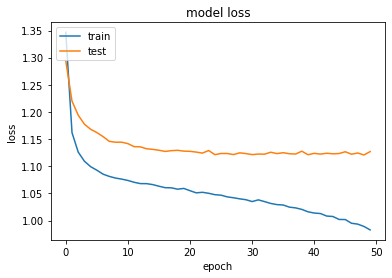

In [0]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# Save model and weights 
model_name = 'Emotion_model1.h5'
save_dir = os.path.join(TRAIN_PATH, 'saved_models')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path  = os.path.join(save_dir, model_name)
model.save(model_path)
print("save model and weights at %s" % model_path)


save model and weights at /content/drive/My Drive/emotion/meld/train/saved_models/Emotion_model1.h5


In [0]:
# Save the model to disk
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
  json_file.write(model_json)

In [0]:
# loading json and model architecture 
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights(model_path)
print("Loaded model from disk")

# Keras optimiser
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 61.93%


## Trying Conv2D Model on MPCC features 

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_rows = 40
num_columns = 1 
num_channels = 1

X_train = X_train.reshape(X_train.shape[0], num_rows, num_columns, num_channels)
X_test = X_test.reshape(X_test.shape[0], num_rows, num_columns, num_channels)

num_labels = y_train.shape[1]
filter_size = 2

# Construct model 
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=1, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=1))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=1, activation='relu'))
model.add(MaxPooling2D(pool_size=1))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=1, activation='relu'))
model.add(MaxPooling2D(pool_size=1))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=1, activation='relu'))
model.add(MaxPooling2D(pool_size=1))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(num_labels, activation='softmax'))

In [80]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam',)

# Display model architecture summary 
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 40, 1, 16)         32        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 40, 1, 16)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 40, 1, 16)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 40, 1, 32)         544       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 40, 1, 32)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 40, 1, 32)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 40, 1, 64)        

In [81]:
model_history=model.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test))

Train on 7354 samples, validate on 830 samples
Epoch 1/50
7354/7354 [==============================] - 4s 482us/step - loss: 1.0925 - acc: 0.6229 - val_loss: 1.0850 - val_acc: 0.6229
Epoch 2/50
7354/7354 [==============================] - 3s 344us/step - loss: 1.0693 - acc: 0.6244 - val_loss: 1.0920 - val_acc: 0.6229
Epoch 3/50
7354/7354 [==============================] - 3s 371us/step - loss: 1.0682 - acc: 0.6244 - val_loss: 1.0760 - val_acc: 0.6229
Epoch 4/50
7354/7354 [==============================] - 3s 387us/step - loss: 1.0667 - acc: 0.6244 - val_loss: 1.0726 - val_acc: 0.6229
Epoch 5/50
7354/7354 [==============================] - 3s 378us/step - loss: 1.0669 - acc: 0.6244 - val_loss: 1.0739 - val_acc: 0.6229
Epoch 6/50
7354/7354 [==============================] - 3s 356us/step - loss: 1.0672 - acc: 0.6244 - val_loss: 1.0741 - val_acc: 0.6229
Epoch 7/50
7354/7354 [==============================] - 3s 354us/step - loss: 1.0671 - acc: 0.6244 - val_loss: 1.0764 - val_acc: 0.6229
E

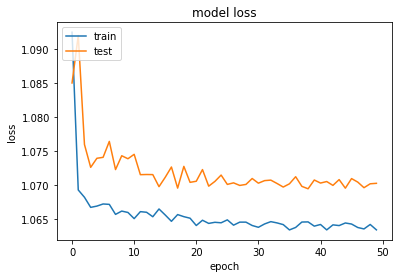

In [82]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [83]:
# Save model and weights 
model_name = 'Emotion_model2.h5'
save_dir = os.path.join(TRAIN_PATH, 'saved_models')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path  = os.path.join(save_dir, model_name)
model.save(model_path)
print("save model and weights at %s" % model_path)

save model and weights at /content/drive/My Drive/emotion/meld/train/saved_models/Emotion_model2.h5


In [0]:
# Save the model to disk
model_json = model.to_json()
with open("model_json2.json", "w") as json_file:
  json_file.write(model_json)

In [85]:
# loading json and model architecture 
json_file = open('model_json2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights(model_path)
print("Loaded model from disk")

# Keras optimiser
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 62.29%


## We see the Conv2D model performs slightly better than the Conv1D model

So we would save the Conv2D model as our final model 

In [86]:
# Getting the predicted values 

preds = loaded_model.predict(X_test, batch_size=16, verbose=1)

preds=preds.argmax(axis=1)
preds

830/830 [==============================] - 0s 215us/step


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

## Comparing the predicted values to the actual values 

In [87]:
reds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
print(finaldf)

    actualvalues predictedvalues
0        disgust         neutral
1        disgust         neutral
2        disgust         neutral
3        disgust         neutral
4        disgust         neutral
..           ...             ...
825          sad         neutral
826          sad         neutral
827          sad         neutral
828          sad         neutral
829          sad         neutral

[830 rows x 2 columns]


## Saving the predictions in a CSV file

In [0]:
finaldf.to_csv('Predictions.csv', index=False)

## Getting the heatMap of actual vs predicted 

In [0]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
  df_cm = pd.DataFrame(
      confusion_matrix, index=class_names, columns=class_names, 
  )
  fig = plt.figure(figsize=figsize)
  try:
      heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  except ValueError:
      raise ValueError("Confusion matrix values must be integers.")
      
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

0.6228915662650603


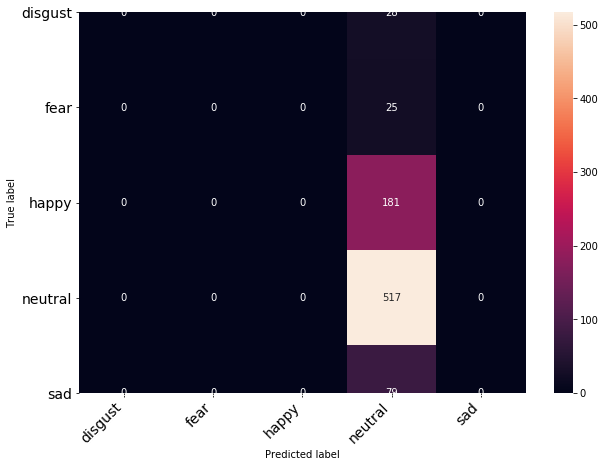

In [92]:
# Get the predictions file 
finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

## Since the data has a large number of 'neutral' sounds the models gets biased towards predicting neutral 

In [94]:
text = pd.DataFrame()
text['fileName'] = val_df['path']
text['prediction'] = finaldf['predictedvalues']
text

,fileName,prediction
0,/content/drive/My Drive/emotion/meld/val/disgu...,neutral
1,/content/drive/My Drive/emotion/meld/val/disgu...,neutral
2,/content/drive/My Drive/emotion/meld/val/disgu...,neutral
3,/content/drive/My Drive/emotion/meld/val/disgu...,neutral
4,/content/drive/My Drive/emotion/meld/val/disgu...,neutral
...,...,...
825,/content/drive/My Drive/emotion/meld/val/sad/M...,neutral
826,/content/drive/My Drive/emotion/meld/val/sad/M...,neutral
827,/content/drive/My Drive/emotion/meld/val/sad/M...,neutral
828,/content/drive/My Drive/emotion/meld/val/sad/M...,neutral


In [0]:
text.to_csv('predicts.txt', index=None, header= True)